<a href="https://colab.research.google.com/github/Loga19818eeanvesh/Natural_Language_Processing_Sequence_Models_Assignments/blob/main/tf_c3w4_a1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K


Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 43.5MB/s]


In [10]:
tokenizer = Tokenizer(oov_token = "UNK")
data = open('/content/sonnets.txt').read()
#print(data)
corpus = data.lower().split('\n')
#print(corpus)
tokenizer.fit_on_texts(corpus)
vocab_len = len(tokenizer.word_index)+1

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_length = max(len(x) for x in input_sequences)
#print(max_sequence_length)

padded_sequences = pad_sequences(input_sequences,padding='pre')

training_sequences = np.array(padded_sequences[:,:-1])
training_labels = np.array(padded_sequences[:,-1])

In [19]:
model = Sequential()
model.add(Embedding(vocab_len, 64 , input_length=max_sequence_length-1))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(vocab_len, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 10, 64)            205568    
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 3212)              208780    
                                                                 
Total params: 439,180
Trainable params: 439,180
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(training_sequences, training_labels, epochs=50, verbose=1)

Epoch 1/50
484/484 [==============================] - 9s 19ms/step - loss: 5.3551 - accuracy: 0.0806
Epoch 2/50
484/484 [==============================] - 9s 19ms/step - loss: 5.2378 - accuracy: 0.0863
Epoch 3/50
484/484 [==============================] - 9s 19ms/step - loss: 5.1277 - accuracy: 0.0928
Epoch 4/50
484/484 [==============================] - 9s 19ms/step - loss: 5.0187 - accuracy: 0.0982
Epoch 5/50
484/484 [==============================] - 9s 19ms/step - loss: 4.9130 - accuracy: 0.1066
Epoch 6/50
484/484 [==============================] - 9s 19ms/step - loss: 4.8105 - accuracy: 0.1096
Epoch 7/50
484/484 [==============================] - 9s 19ms/step - loss: 4.7082 - accuracy: 0.1203
Epoch 8/50
484/484 [==============================] - 9s 19ms/step - loss: 4.6115 - accuracy: 0.1266
Epoch 9/50
484/484 [==============================] - 11s 22ms/step - loss: 4.5084 - accuracy: 0.1378
Epoch 10/50
484/484 [==============================] - 9s 19ms/step - loss: 4.4198 - accur

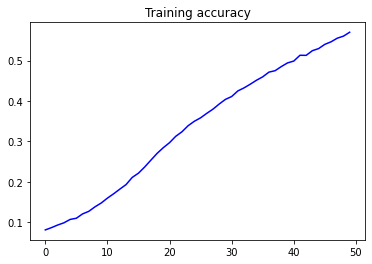

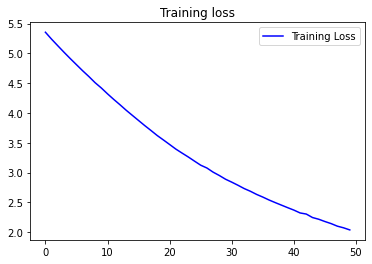

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [41]:
reverse_word_index = {}
for word in tokenizer.word_index:
  i = tokenizer.word_index[word]
  reverse_word_index[i] = word

seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
for i in range(next_words):
  token_list = tokenizer.texts_to_sequences(seed_text)
  token_list = pad_sequences(token_list, maxlen=max_sequence_length-1, padding='pre', truncating='pre')
  #print(len(token_list))
  pred = model.predict(token_list , verbose=0)
  #print(pred.shape)
  pred = pred[-1, : ]
  #print(pred.shape)
  pred_class = np.argmax(pred)
  print(pred_class)
  seed_text = seed_text + " " + reverse_word_index[pred_class]


print(seed_text)

4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
4
72
Help me Obi Wan Kenobi, you're my only hope to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how to how
